<a href="https://colab.research.google.com/github/nidhi2399/deep-learning/blob/main/DL_DA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
#20MAI0020-Nidhi Ghuble 

#https://github.com/nidhi2399

In [119]:
#TASK 1:

In [120]:
# Importing Necessary Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D 
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split

In [121]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10

(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [146]:
print('x_train shape:', x_train.shape)

print('Number of images in x_train', x_train.shape[0])

print('Number of images in x_test', x_test.shape[0])

print('Number of classes in dataset:',len(np.unique(y_test)))

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000
Number of images in x_test 10000
Number of classes in dataset: 10


In [122]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

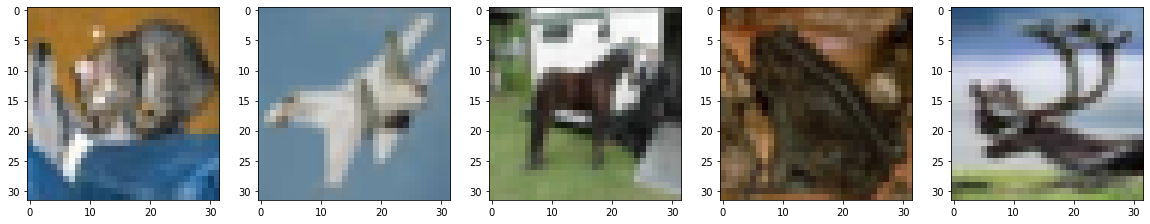

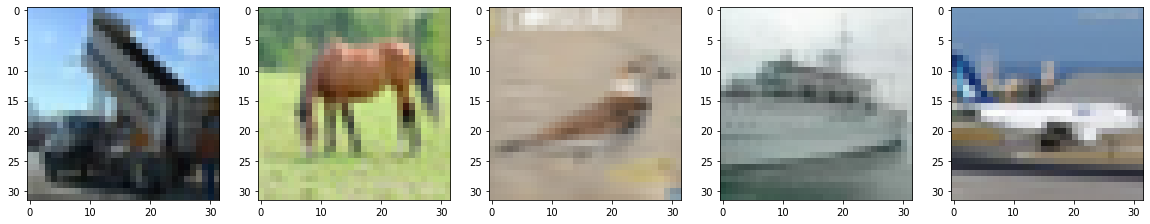

In [123]:
#Display sample input and output images
plt.figure(figsize=(20,5))
plt.subplot(151),plt.imshow(x_test[0])
plt.subplot(152),plt.imshow(x_test[10])
plt.subplot(153),plt.imshow(x_test[20])
plt.subplot(154),plt.imshow(x_test[30])
plt.subplot(155),plt.imshow(x_test[40])
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(151),plt.imshow(x_test[50])
plt.subplot(152),plt.imshow(x_test[60])
plt.subplot(153),plt.imshow(x_test[70])
plt.subplot(154),plt.imshow(x_test[80])
plt.subplot(155),plt.imshow(x_test[90])
plt.show()

In [124]:
y_train = (y_train == 2).astype(int)

y_test = (y_test == 2).astype(int)

In [125]:
# Normalize image data (pixel values from 0 to 255) to the 0-to-1 range
x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

x_train /= 255

x_test /= 255

In [126]:
print('x_train shape:', x_train.shape)

print('Number of images in x_train', x_train.shape[0])

print('Number of images in x_test', x_test.shape[0])

print('Number of classes in dataset:',len(np.unique(y_test)))

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000
Number of images in x_test 10000
Number of classes in dataset: 2


In [127]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))

model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Dropout(0.25))



model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))

model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Dropout(0.25))



model.add(Flatten())

model.add(Dense(512, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [128]:
# Compile the model
model.compile(    
    loss='binary_crossentropy',    
    optimizer="adam",    
    metrics=['accuracy'])

In [129]:
# Save the trained model to a file so we can use it to make predictions later
model.save("new_model.h5")

In [130]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 16s 9ms/step - loss: 0.3690 - accuracy: 0.8799
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2582 - accuracy: 0.9037
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2352 - accuracy: 0.9113
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2168 - accuracy: 0.9181
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2083 - accuracy: 0.9214
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2005 - accuracy: 0.9238
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1913 - accuracy: 0.9271
Epoch 8/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1749 - accuracy: 0.9337
Epoch 9/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.1682 - accuracy: 0.9355
Epoch 10/10
1563/1563 [==============================] - 15s 9ms/step - l

In [131]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = model.evaluate(x_train, y_train, batch_size=128)

print("train loss, train accuracy:", results)

Evaluate on train data
391/391 [==============================] - 3s 7ms/step - loss: 0.1392 - accuracy: 0.9460
train loss, train accuracy: [0.13921387493610382, 0.9459999799728394]


In [132]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)

print("test loss, test accuracy:", results)

Evaluate on test data
79/79 [==============================] - 1s 7ms/step - loss: 0.2093 - accuracy: 0.9292
test loss, test accuracy: [0.2093118578195572, 0.9291999936103821]


In [133]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])

print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 1)


In [134]:
from sklearn import metrics
y_pred = []

# Model configuration
img_width, img_height = 28, 28

y_pred = np.array(y_pred)


# Generate predictions for samples
y_pred = model.predict(x_test)
#print(predictions)
print(y_pred.shape)
# Generate arg maxes for predictions
y_pred = np.argmax(y_pred, axis = 1)

print("Accuracy:({0:.4f})".format(metrics.accuracy_score(y_test,y_pred)))

(10000, 1)
Accuracy:(0.9000)


In [135]:
#TASK 2:

In [136]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

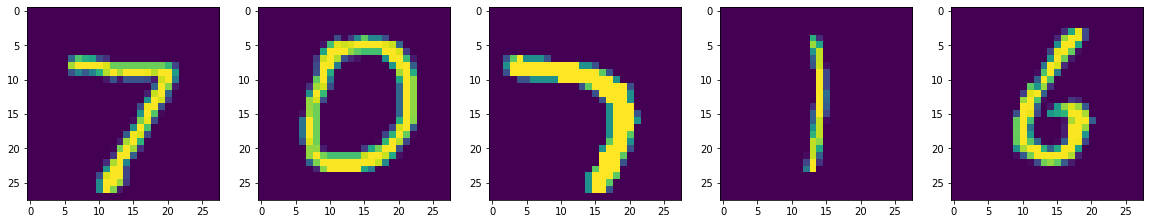

In [137]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(20,5))
plt.subplot(151),plt.imshow(X_test[0])
plt.subplot(152),plt.imshow(X_test[10])
plt.subplot(153),plt.imshow(X_test[60])
plt.subplot(154),plt.imshow(X_test[40])
plt.subplot(155),plt.imshow(X_test[50])
plt.show()

In [144]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [139]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(12, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 12)                4812      
_________________________________________________________________
dense_47 (Dense)             (None, 84)              

In [140]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.8957 - accuracy: 0.7070 - val_loss: 0.1291 - val_accuracy: 0.9552
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1134 - accuracy: 0.9643 - val_loss: 0.0712 - val_accuracy: 0.9757
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0774 - accuracy: 0.9756 - val_loss: 0.0639 - val_accuracy: 0.9804
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0637 - accuracy: 0.9802 - val_loss: 0.0659 - val_accuracy: 0.9802
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0555 - accuracy: 0.9836 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.0471 - val_accuracy: 0.9852
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0436 - val_accuracy: 0.9853
Epoch 